SPECT Heart Data Set
https://archive.ics.uci.edu/ml/datasets/SPECT+Heart
Data on cardiac Single Proton Emission Computed Tomography (SPECT) images. 
Each patient classified into two categories: normal and abnormal.

23 Attributes:
Attribute Information:
OVERALL_DIAGNSIS: 
0,1 (class attribute, binary) 
2.- 23. F1-F22: 0,1 (the partial diagnosis 1-22, binary)

C5_PCA_Part2_HW: Load PCA model and use it on test data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readFile(filename):
    contents=[]
    file1=open(filename,'r')
    for line in iter(file1):
        line=line.strip()
        contents.append(line.split(','))
    return contents

In [3]:
# load the model from disk
import pickle
filename = 'spect_pca.pkl'
loaded_pca_model = pickle.load(open(filename, 'rb'))

In [4]:
testDS=readFile('../dataSet/SPECT/SPECT.test')

In [21]:
datasetTest = np.array(testDS)
Xtp = datasetTest[:,1:]
Ytp = datasetTest[:,0]
Xtest = Xtp.astype(np.int)
Ytest = Ytp.astype(np.int)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [7]:
print(loaded_pca_model.explained_variance_ratio_)

[0.26410348 0.16941228 0.11876408 0.07814218 0.05823066 0.05432805
 0.04006321]


In [8]:
print(loaded_pca_model.components_)

[[ 0.28573247  0.19395709  0.2869596   0.17473468  0.2159503   0.07601637
   0.25301934  0.22303585  0.19384151  0.24408277  0.15336971  0.27199568
   0.29255199  0.23170377  0.0688465   0.24357177  0.1487634   0.13791205
   0.1661136   0.15783958  0.26152253  0.20404954]
 [ 0.37160313  0.11612959 -0.26718749 -0.25717804  0.4166722   0.18296028
   0.06171036 -0.26237742 -0.14510145  0.31116007  0.1783315   0.0691191
  -0.29105872 -0.12729056 -0.10102255 -0.11673237  0.09061201 -0.03149865
   0.28182693  0.07405465 -0.19731423 -0.13749285]
 [-0.32449019  0.30151822 -0.16403083 -0.13674966 -0.23305679  0.1264791
   0.39431396 -0.18272437 -0.13456745 -0.30401151  0.21973715  0.36441708
  -0.15099946 -0.16931843 -0.08881334  0.09654269  0.18299426  0.19055483
  -0.00662726 -0.02965469  0.08565787  0.24627229]
 [-0.15018515  0.0761288  -0.13503743  0.25466246 -0.13365435  0.25230264
  -0.16710676 -0.08417435  0.39876744 -0.23219631  0.22228095 -0.1305514
  -0.17949536  0.38084403  0.0617537

In [9]:
print(Xtest.shape)

(187, 22)


In [12]:
principalComponents=loaded_pca_model.transform(Xtest)

In [13]:
print(principalComponents.shape)

(187, 7)


In [17]:
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2','principal component 3',\
                                      'principal component 4','principal component 5','principal component 6',\
                                      'principal component 7'])
principalDf["class"]=Ytest

In [ ]:
#finalDf = pd.concat([principalDf, Ytest], axis = 1)

In [20]:
print(principalDf.head(2))

   principal component 1  principal component 2  principal component 3  \
0               0.910801               0.642764              -1.260145   
1               0.141436               0.485971              -1.078706   

   principal component 4  principal component 5  principal component 6  \
0               1.338633               0.646093               0.587981   
1              -0.401795               0.339820               0.089713   

   principal component 7  class  
0               0.262670      1  
1              -0.215522      1  


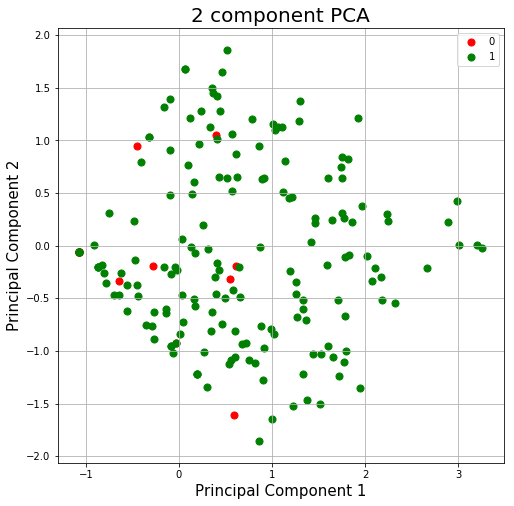

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['class'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(principalComponents,Ytest)
print(model)
# make predictions
expected = Ytest
predicted = model.predict(principalComponents)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        15
          1       0.92      1.00      0.96       172

avg / total       0.85      0.92      0.88       187

[[  0  15]
 [  0 172]]


C:\Users\Chiachi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(principalComponents,Ytest)
print(model)
# make predictions
expected = Ytest
predicted = model.predict(principalComponents)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

GaussianNB(priors=None)
             precision    recall  f1-score   support

          0       0.45      0.60      0.51        15
          1       0.96      0.94      0.95       172

avg / total       0.92      0.91      0.91       187

[[  9   6]
 [ 11 161]]


In [24]:
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(principalComponents,Ytest)
print(model)
# make predictions
expected = Ytest
predicted = model.predict(principalComponents)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.64      0.47      0.54        15
          1       0.95      0.98      0.97       172

avg / total       0.93      0.94      0.93       187

[[  7   8]
 [  4 168]]


In [25]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(principalComponents,Ytest)
print(model)
# make predictions
expected = Ytest
predicted = model.predict(principalComponents)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        15
          1       1.00      0.97      0.99       172

avg / total       0.98      0.97      0.97       187

[[ 15   0]
 [  5 167]]
